In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data/car-sales-extended-missing-data.csv')
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
df.dropna(subset=['Price'],inplace=True)

In [5]:
x=df.drop('Price',axis=1)
y=df['Price']

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
obj_fet=['Make','Colour']
number_fet=['Odometer (KM)']
door_fet=['Doors']

    
obj_imputer=SimpleImputer(strategy='constant',fill_value='Missing')
number_imputer=SimpleImputer(strategy='mean')
door_imputer=SimpleImputer(strategy='most_frequent')


transformer=ColumnTransformer([
    ('obj_imputer',obj_imputer,obj_fet),
    ('number_imputer',number_imputer,number_fet),
    ('door_imputer',door_imputer,door_fet)
])

modifieddf=transformer.fit_transform(x)

In [8]:
modifiedx=pd.DataFrame(modifieddf,columns=['Make','Colour','Odometer (KM)','Doors'])

In [9]:
modifiedx.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [10]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [11]:
modifiedx.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

# Make dataFrame as numerical

In [12]:
x.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
dtype: object

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

fet=['Make','Colour','Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([
    ('one_hot',one_hot,fet)
],remainder='passthrough')

x=transformer.fit_transform(modifiedx)

In [14]:
x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# Fit a model

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train);

In [17]:
rf.score(x_test,y_test)

0.24127164876297946

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train);


In [19]:
clf.score(x_test,y_test)

0.0

In [20]:

df=pd.read_csv('data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
x=df.drop('target',axis=1)
y=df['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf=RandomForestClassifier(n_estimators=100)

In [28]:
clf.fit(x_train,y_train)
clf.score(x_train,y_train),clf.score(x_test,y_test)

(1.0, 0.8524590163934426)

In [29]:
result=clf.predict(x_test)

In [30]:
result

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [31]:
clf.predict_proba(x_test)

array([[0.81, 0.19],
       [0.37, 0.63],
       [0.37, 0.63],
       [0.48, 0.52],
       [0.25, 0.75],
       [0.43, 0.57],
       [0.31, 0.69],
       [0.85, 0.15],
       [0.96, 0.04],
       [0.1 , 0.9 ],
       [0.02, 0.98],
       [0.24, 0.76],
       [0.5 , 0.5 ],
       [0.67, 0.33],
       [0.45, 0.55],
       [0.83, 0.17],
       [0.76, 0.24],
       [0.21, 0.79],
       [0.14, 0.86],
       [0.11, 0.89],
       [0.52, 0.48],
       [0.19, 0.81],
       [0.16, 0.84],
       [0.04, 0.96],
       [0.95, 0.05],
       [0.83, 0.17],
       [0.17, 0.83],
       [0.97, 0.03],
       [0.09, 0.91],
       [0.25, 0.75],
       [0.22, 0.78],
       [0.2 , 0.8 ],
       [0.  , 1.  ],
       [0.56, 0.44],
       [0.9 , 0.1 ],
       [0.79, 0.21],
       [0.85, 0.15],
       [0.02, 0.98],
       [0.9 , 0.1 ],
       [0.46, 0.54],
       [0.94, 0.06],
       [0.55, 0.45],
       [0.31, 0.69],
       [0.19, 0.81],
       [0.08, 0.92],
       [0.28, 0.72],
       [0.02, 0.98],
       [0.12,

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,result)

0.14754098360655737

In [33]:
from sklearn.model_selection import cross_val_score

cval=cross_val_score(clf,x,y,cv=5)

In [34]:
cval

array([0.83606557, 0.8852459 , 0.78688525, 0.78333333, 0.8       ])

In [35]:
np.mean(cval), clf.score(x_test,y_test)

(0.8183060109289617, 0.8524590163934426)

In [40]:

print(f"Model Accuricy {clf.score(x_test,y_test)*100:.2f}%");

Model Accuricy 85.25%


In [47]:
clf.predict_proba(x_test[:5])

array([[0.81, 0.19],
       [0.37, 0.63],
       [0.37, 0.63],
       [0.48, 0.52],
       [0.25, 0.75]])

In [48]:
from sklearn.metrics import roc_curve

y_probs=clf.predict_proba(x_test)
y_probs=y_probs[:, 1]
y_probs

fpr,tpr,thresholds=roc_curve(y_test,y_probs)


array([0.        , 0.03225806, 0.12903226, 0.16129032, 0.22580645,
       0.4516129 , 0.48387097, 0.51612903, 0.5483871 , 0.5483871 ,
       0.58064516, 0.64516129, 0.70967742, 0.77419355, 0.80645161,
       0.80645161, 0.80645161, 0.83870968, 0.93548387, 0.93548387,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [59]:
def plot_roc_curve(fpr,tpr):
    """
    Plots a Roc Curve 
    take 2 parameter true positive rate tpr, and false positive 
    rate fpr
    """
    
    plt.plot(fpr,tpr,color='orange',label="ROC")
    plt.plot([0,1],[0,1],color='green',linestyle='--',label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

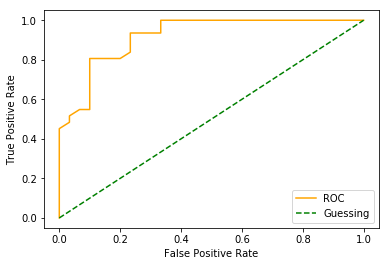

In [60]:
plot_roc_curve(fpr,tpr)

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_test)

1.0

In [62]:
roc_auc_score(y_test,y_probs)

0.9198924731182795

In [63]:
from sklearn.metrics import confusion_matrix

y_predict=clf.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[23,  7],
       [ 2, 29]], dtype=int64)

In [65]:
pd.crosstab(y_test,y_predict,rownames=['Actual Label'],colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,23,7
1,2,29


In [66]:
import seaborn as sns

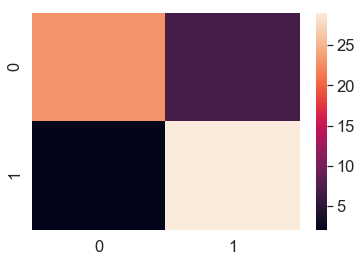

In [70]:
sns.set(font_scale=1.5)

conf=confusion_matrix(y_test,y_predict)

sns.heatmap(conf);

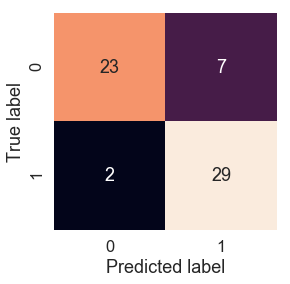

In [76]:
def plot_conf_mat(confm):
    
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confm,annot=True,cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_conf_mat(conf)